##### Nonconvex quadratic programming
* Method: trusy region
* box: [0, 1] (projection/interior point method)

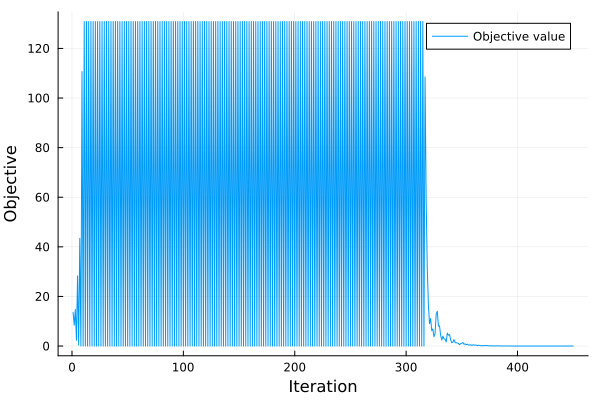

Converged in 450 iterations


In [1]:
# Interor Point Method
using LinearAlgebra
using Plots

# Generate a 10x10 non-positive definite matrix Q
Q = rand(10, 10)
Q = Q * Q' - 5I

# Generate a 10-dimensional vector q
q = rand(10)

# Objective function
objective(x) = 0.5 * x' * Q * x + q' * x

# Gradient of the objective function
gradient(x) = Q * x + q

# Interior Point Method
function interior_point_method(Q, q, x0; α=0.01, τ=0.1, max_iters=1000, tolerance=1e-5)
    x = x0
    objective_values = []

    for i in 1:max_iters
        # Barrier term and its gradient
        barrier = -τ * sum(log.(x) .+ log.(1 .- x))
        grad_barrier = -τ * (1 ./ x - 1 ./ (1 .- x))
        
        # Total gradient
        grad = gradient(x) + grad_barrier

        # Update step
        x_new = x - α * grad

        # Ensure feasibility
        x_new = max.(min.(x_new, 1 - 1e-10), 1e-10)
        
        # Objective value (without barrier term for visualization)
        push!(objective_values, objective(x_new))

        # Check convergence
        if norm(x - x_new) < tolerance
            println("Converged in $i iterations")
            break
        end
        x = x_new

        # Decrease the barrier term influence
        τ *= 0.95
    end
    return x, objective_values
end

# Initial guess
x0 = rand(10)

# Run the optimization
x_star, objective_values = interior_point_method(Q, q, x0)

# Plotting the convergence
p = plot(objective_values, label="Objective value", xlabel="Iteration", ylabel="Objective")
display(p)
sleep(10)

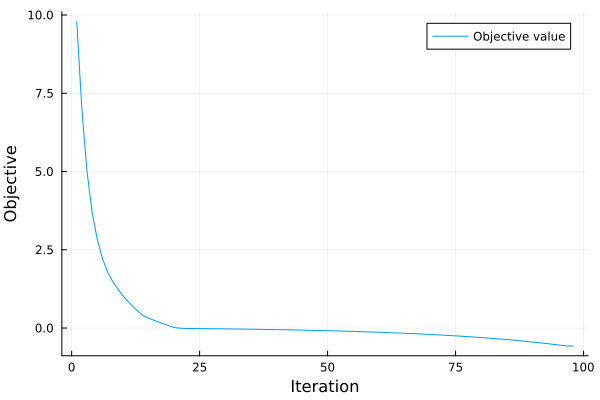

Converged in 98 iterations


In [3]:
# Projection
using LinearAlgebra
using Plots

# Generate a 10x10 non-positive definite matrix Q
Q = rand(10, 10)
Q = Q * Q' - 5I

# Generate a 10-dimensional vector q
q = rand(10)

# Objective function
objective(x) = 0.5 * x' * Q * x + q' * x

# Gradient function
gradient(x) = Q * x + q

# Projection function
projection(x) = max.(min.(x, 1), 0)

# Gradient descent with projection
function projected_gradient_descent(Q, q, x0; α=0.01, max_iters=1000, tolerance=1e-5)
    x = x0
    objective_values = []

    for i in 1:max_iters
        grad = gradient(x)
        x_new = x - α * grad
        x_new = projection(x_new)
        push!(objective_values, objective(x_new))
        
        # Check convergence
        if norm(x - x_new) < tolerance
            println("Converged in $i iterations")
            break
        end
        x = x_new
    end
    return x, objective_values
end

# Initial guess
x0 = rand(10)

# Run the optimization
x_star, objective_values = projected_gradient_descent(Q, q, x0)

# Plotting the convergence
p = plot(objective_values, label="Objective value", xlabel="Iteration", ylabel="Objective")
display(p)
sleep(10)
